In [1]:
using JLD2, Plots

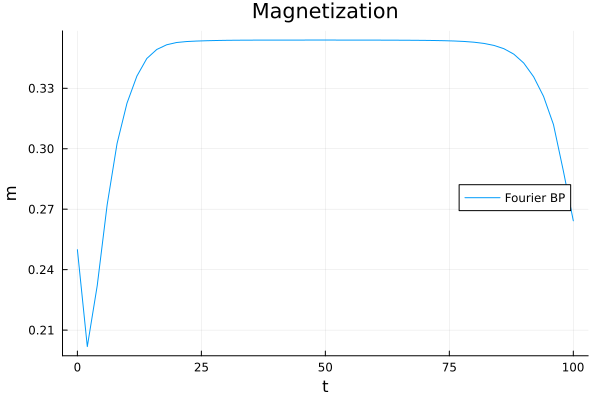

In [7]:
D = load("random_coupling_er10_magnetization.jld2")
# m = D["m"]
m_fourier = D["m_fourier"]

i = 5
# y = m[i]
y_fourier = m_fourier[i]

T = length(y_fourier)
plot(0:2:T, y_fourier[1:2:end], label="Fourier BP", xlabel="t", ylabel="m", title="Magnetization", legend=:right)
# plot!(0:2:T, y[1:2:end], label="BP")